In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple

In [3]:
def __random_fn_def__():
    def __random_fn__(shape):
        return np.zeros(shape)
    
    return __random_fn__
    
__random_fn__ = __random_fn_def__()

# Práctica 1: Datos Linealmente Separables

__Instrucciones__: A continuación hay una lista de funciones que debe implementar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

- generate_data &#x1F625;
- label_data &#x1F625;
- compute_line_points &#x1F643;
- train_pla &#x1F921;

__Notas:__
- No está permitido el uso de ninguna paquetería adicional a las importadas en este cuaderno.
- Puede agregar más celdas en caso de que así lo requiera.
- Los únicos espacios permitidos para codificar serán aquellos marcados por _#CÓDIGO AQUI_ y las celdas que usted agregue. __NO MODIFIQUE NINGUNA OTRA CELDA__.

In [4]:
def generate_data(
    n_dims: int,
    n_samples: int,
    from_distribution: str="normal",
    distribution_params: Dict[str, float]={"mean": 0., "std": 1.}
) -> np.array:
    """
    Descripción:
    Esta funcion genera datos artificiales muestreados de una distribución de probabilidad especificada.
    
    Entradas:
    - n_dims: Número de dimensiones (características) que contendrá cada ejemplo 
    - n_samples: Número de muestreos (ejemplos) que deberán ser generados
    - from_distribution: Distribución de la que deberán ser muestreados los puntos, "normal" o "uniform"   
    - distribution_params: Parámetros para la distribución de la que serán muestradas los valores.
        "uniform": {
            "low": El número mínimo que puede ser muestreado
            "high": El número máximo que puede ser muestreado
            }
        "normal": {
            "mean": La media que tendrá la distribución normal
            "std": La desviación estándar de la distribución normal
            }
            
    Salidas:
    - Un arreglo de numpys muestreado de la distribución seleccionada con dimensiones (n_samples, n_dims)
    """
    
    examples = __random_fn__((n_samples, n_dims))
    # CÓDIGO AQUÍ
    if from_distribution == "normal":
        for i in range(n_samples):
            for j in range(n_dims):
                examples[i,j] = np.random.normal(distribution_params["mean"], distribution_params["std"])
    else:
        for i in range(n_samples):
            for j in range(n_dims):
                examples[i,j] = np.random.uniform(**distribution_params)
                
    return examples

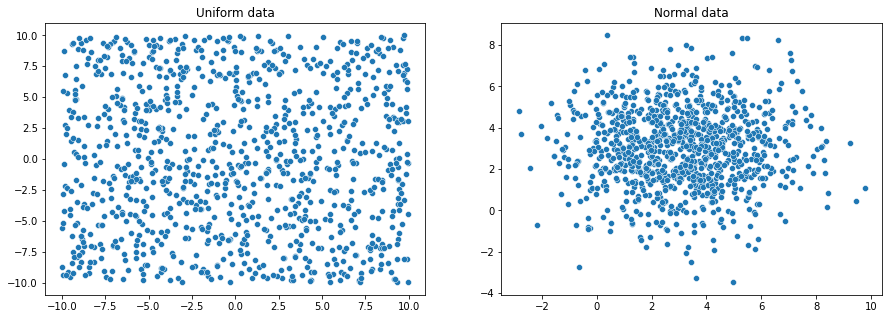

In [5]:
__n_samples__ = 1000
__n_dims__ = 2

__uniform__ = generate_data(
    n_dims=__n_dims__, 
    n_samples=__n_samples__, 
    from_distribution="uniform", 
    distribution_params={"low": -10., "high": 10.}
)

__normal__ = generate_data(
    n_dims=__n_dims__, 
    n_samples=__n_samples__, 
    from_distribution="normal", 
    distribution_params={"mean": 3., "std": 2.}
)

assert __uniform__.shape == (__n_samples__, __n_dims__)
assert __normal__.shape == (__n_samples__, __n_dims__)

__fig__, __axs__ = plt.subplots(ncols=2, figsize=(15, 5))
__axs__[0].set(title="Uniform data")
__axs__[1].set(title="Normal data")
_ = sns.scatterplot(x=__uniform__[:, 0], y=__uniform__[:, 1], ax=__axs__[0])
_ = sns.scatterplot(x=__normal__[:, 0], y=__normal__[:, 1], ax=__axs__[1])

In [6]:
def label_data(
    data: np.array,
    model: np.array=None
) -> np.array: 
    """
    Descripción:
    Esta funcion genera el etiquetado de datos artificiales de acuerdo a un modelo generado. 
    En caso de no ser recibido como parámetro, el modelo debe ser generado aleatoriamente de 
    una distribución normal con media 0 y varianza 1.
    
    Entradas:
    - data: Datos a etiquetar de dimensiones Número de dimensiones (# ejemplos, # características)
    - model: Modelo utilizado para etiquetar
            
    Salidas:
    - Un arreglo de numpy referente a las etiquetas asignadas a cada ejemplo recibido en la entrada "data".
    - Un arreglo de numpy referente al modelo generado aleatoriamente.
    """
    
    labels = __random_fn__((data.shape[0],))
    if model is None:
        model = __random_fn__((data.shape[1] + 1,))
    
    # CÓDIGO AQUÍ
    if np.array_equal(model, np.zeros(data.shape[1] + 1)):
        for i in range(data.shape[1] + 1):
            model[i] = np.random.normal(0, 1)
    
    for i in range(data.shape[0]):
        if model @ np.append(data[i], 1) < 0:
            labels[i] = -1
        else: 
            labels[i] = 1
    return labels, model

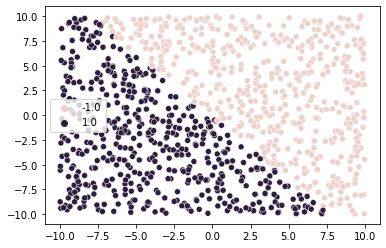

In [7]:
__labels__, __model__ = label_data(__uniform__)

assert __labels__.shape == (__n_samples__,)
assert __model__.shape == (__n_dims__ + 1,)

_ = sns.scatterplot(x=__uniform__[:, 0], y=__uniform__[:, 1], hue=__labels__)

In [8]:
def compute_line_points(
    model: np.array,
    bounds: Tuple[float, float]=(-10, 10)
) -> np.array: 
    """
    Descripción:
    Esta funcion genera los puntos en los extremos de la linea generada por un modelo bidimensional 
    recibido como parámetro.
    
    Entradas:
    - model: El modelo que representa una linea. El modelo debe tener exactamente tres parámetros.
    - bounds: Indíca el límite inferior y superior del eje x, en un plano cartesiano, para los cuales 
            deben ser obtenidos los valores de y
            
    Salidas:
    - Un arreglo de numpy de tamaño 2x2 (una matriz), donde cada fila representa las coordenadas (x, y) de
        la linea
    """
    
    assert model.shape == (3,)    
    points = __random_fn__((2, 2)) 
    
    # CÓDIGO AQUÍ
    for i in range(2):
        points[i, 0] = bounds[i]
    for i in range(2):
        points[i, 1] = ((model[0] * points[i,0]) + model[2]) / -model[1]
    return points

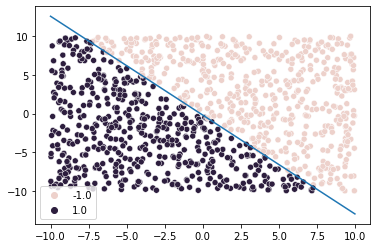

In [9]:
__line_points__ = compute_line_points(__model__, bounds=(-10, 10))

assert __line_points__.shape == (2, 2)

_ = sns.scatterplot(x=__uniform__[:, 0], y=__uniform__[:, 1], hue=__labels__)
_ = sns.lineplot(x=__line_points__[:, 0], y=__line_points__[:, 1])

In [10]:
def train_pla(
    data,
    target,
    max_iters=1000
) -> np.array: 
    """
    Descripción:
    Esta funcion ejecuta una variante del algoritmo PLA para clasificar datos linealmente separables.
    
    Entradas:
    - data: Indica las características utilizadas para la clasificación.
    - target: Indíca las etiquetas que se esperan obtener despues de una correcta clasificación.
    - max_iters: Indica el número máximo de iteraciones del algoritmo. Si el algoritmo no converge
                antes del número máximo de iteraciones, se detiene y devuelve los parámetros 
                calculados hasta el momento.
            
    Salidas:
    - Un arreglo de numpy indicando los parámetros calculados
    """
        
    model = __random_fn__((data.shape[1] + 1,))
    
    # CÓDIGO AQUÍ
    for i in range(max_iters):
        labels = __random_fn__((data.shape[0]))
        for i in range(data.shape[0]):
            if model @ np.append(data[i], 1) < 0:
                labels[i] = -1
            else: 
                labels[i] = 1
        indexes_missclassified = list()
        for i in range(len(labels)):
            if labels[i] != target[i]:
                indexes_missclassified.append(i)
        if len(indexes_missclassified) != 0:
            choose_missclassified = np.random.choice(indexes_missclassified, 1)
            model = model + (target[choose_missclassified] * np.append(data[choose_missclassified], 1))
        else:
            break
    return model

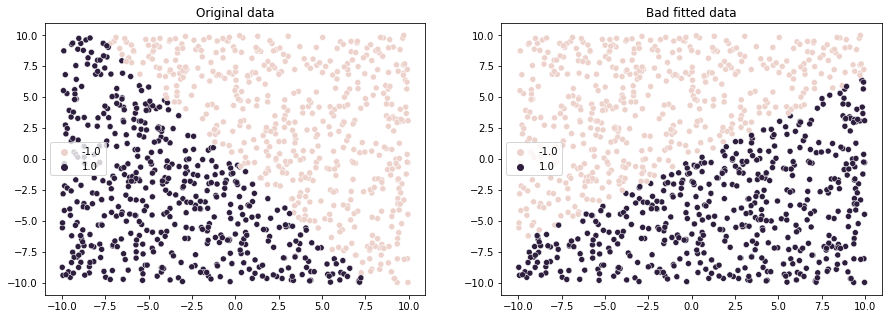

In [11]:
__bpla_model__ = train_pla(__uniform__, __labels__, max_iters=1)

assert __bpla_model__.shape == (__n_dims__ + 1,)

__bpla_labels__, _ = label_data(__uniform__, __bpla_model__)

__fig__, __axs__ = plt.subplots(ncols=2, figsize=(15, 5))
__axs__[0].set(title="Original data")
__axs__[1].set(title="Bad fitted data")
_ = sns.scatterplot(x=__uniform__[:, 0], y=__uniform__[:, 1], ax=__axs__[0], hue=__labels__)
_ = sns.scatterplot(x=__uniform__[:, 0], y=__uniform__[:, 1], ax=__axs__[1], hue=__bpla_labels__)

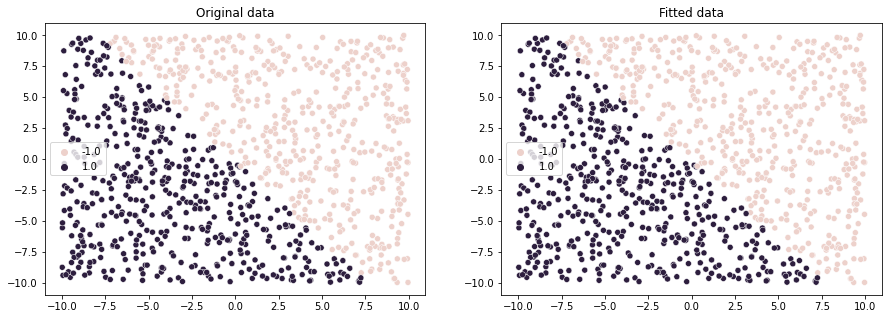

In [12]:
__pla_model__ = train_pla(__uniform__, __labels__, max_iters=2 * __n_samples__)

assert __pla_model__.shape == (__n_dims__ + 1,)

__pla_labels__, _ = label_data(__uniform__, __pla_model__)

__fig__, __axs__ = plt.subplots(ncols=2, figsize=(15, 5))
__axs__[0].set(title="Original data")
__axs__[1].set(title="Fitted data")
_ = sns.scatterplot(x=__uniform__[:, 0], y=__uniform__[:, 1], ax=__axs__[0], hue=__labels__)
_ = sns.scatterplot(x=__uniform__[:, 0], y=__uniform__[:, 1], ax=__axs__[1], hue=__pla_labels__)

## Integrity Tests

In [13]:
import hashlib

cell_signs = [
    "449111399bb0dc73c3f4a9c612116296cfffc2be",
    "d2f8bfa1c856620f009d12f6272e5935dea8cda2",
    "ffe3ff8cb2cb75dc39fb033740fa1589c67723ae",
    "158ac9ab2ed7f2164042b0f1f2f0b95749be4e00",
    "d9394982d59299e6500172089d4ba5fcd8b4183d",
    "ed7cfbafb8069a43019807d76b77426ac49143a9",
    "59948fb3a7667e8b9de408d1c1210ed58f534cec"
]

for content in _ih:
    content_sign = str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest())
    if content_sign == cell_signs[0]:
        cell_signs.pop(0)
        if len(cell_signs) == 0:
            break
        
if len(cell_signs) > 0:
    print("Something was modified...")
    for cell_sign in cell_signs:
        print(cell_sign)

In [14]:
content = _ih[-2]
program_sign = "86f5b55fbf5566972cfa80ed92fdebff475fed55"
if str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest()) == program_sign:
    print("Everything is consistent :)")

Everything is consistent :)
